In [2]:
# imports 

import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from sklearn.metrics import confusion_matrix
from numpy import linalg as la 
import scipy

# validate that imports and dependencies are setup correctly 
print("Imports successful ...")

Imports successful ...


In [3]:
# load the mnst characer dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

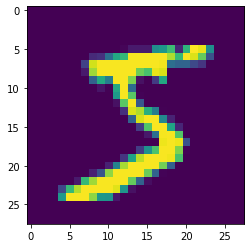

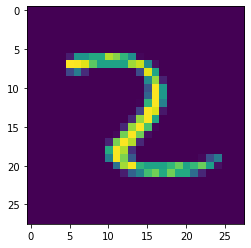

In [4]:
# create a plotting object and show examples
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(x_train[0,:,:])

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.imshow(x_test[2500, :, :])

In [5]:
y_test[2500] 

2

In [6]:
784/16

49.0

In [7]:
# construct a machine learning model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(784, activation=tf.nn.tanh),
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [8]:
#compile model
model.compile(optimizer="SGD", loss = 'mean_squared_error', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 7s 4ms/step - loss: 27.3177 - accuracy: 0.0947


In [10]:
test_predictions = model.predict(x_test)

In [11]:
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))

In [12]:
confusion

array([[ 98,  81, 127, 137, 109,  96,  66,  86, 108,  72],
       [ 88, 110, 170, 137, 112, 102, 150,  80,  76, 110],
       [ 86, 116, 140,  73,  77,  92, 120,  76, 142, 110],
       [ 72,  92, 104,  96, 143,  91,  95,  77, 132, 108],
       [129,  99, 111, 140,  57,  85,  92,  93, 108,  68],
       [ 98,  89,  88,  88,  88,  86,  94,  72,  88, 101],
       [102, 111, 133,  87, 102,  71,  81,  60, 130,  81],
       [103, 130,  80,  89, 160, 103, 104, 100,  83,  76],
       [103, 123, 121,  99, 102,  52, 106, 102, 103,  63],
       [ 78,  99, 109, 116, 109, 103,  89,  87, 112, 107]], dtype=int64)

In [13]:
model.compile(optimizer="SGD", loss = 'mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 27.3150 - accuracy: 0.1013
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 27.3062 - accuracy: 0.100 - 8s 5ms/step - loss: 27.3139 - accuracy: 0.1006
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 27.3132 - accuracy: 0.1028
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 27.3125 - accuracy: 0.0999
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 27.3120 - accuracy: 0.1002
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 27.3116 - accuracy: 0.1006: 1s - 
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 27.3112 - accuracy: 0.1009
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 27.3108 - accuracy: 0.0996
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 27.3105 - accuracy: 0.0994
Epoch 10/10
1875/

In [14]:
test_predictions = model.predict(x_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

array([[ 97, 111,  91,  99,  83, 102, 104, 102, 106,  85],
       [ 95, 143, 106,  86, 136,  91, 153,  95, 133,  97],
       [106, 108, 121,  93, 110,  94, 105,  86, 106, 103],
       [ 80, 122, 100, 100, 113, 109,  96,  95,  94, 101],
       [103, 125, 118,  94,  94,  91,  93,  87,  95,  82],
       [ 89, 111, 103,  74,  92,  91,  98,  86,  72,  76],
       [ 75,  91,  96,  90, 118, 118,  98,  86,  92,  94],
       [ 85, 118,  95,  81, 121, 115, 105, 100, 106, 102],
       [112,  99,  83,  81, 100, 111, 124,  82,  96,  86],
       [102,  85,  92, 126, 127,  94,  92, 104,  92,  95]], dtype=int64)

In [15]:
# use a different loss function than mean squared error
model.compile(optimizer="SGD", loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.4989 - accuracy: 0.8496


In [17]:
test_predictions = model.predict(x_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

array([[ 954,    0,    2,    1,    0,   10,    6,    2,    4,    1],
       [   0, 1117,    3,    1,    1,    0,    4,    2,    7,    0],
       [  13,    2,  921,   12,    9,    0,   12,   20,   35,    8],
       [   3,    2,   23,  899,    0,   17,    4,   16,   31,   15],
       [   0,    1,    9,    2,  843,    0,   17,    2,   17,   91],
       [   8,    4,    8,   48,    5,  755,   23,    5,   25,   11],
       [  10,    2,   12,    1,   10,    6,  909,    3,    5,    0],
       [   3,   15,   40,    2,    5,    0,    0,  920,    5,   38],
       [   9,    7,   10,   29,    8,   17,   14,   12,  850,   18],
       [  12,    7,    7,   10,   19,    8,    0,   32,    3,  911]],
      dtype=int64)

## Homework Question 2

In [45]:
x = np.random.randint(-5, 5, (10, 2))
x

array([[-5,  4],
       [ 1,  3],
       [ 4,  4],
       [ 0,  4],
       [-2, -5],
       [ 0,  1],
       [-4,  0],
       [-3, -5],
       [ 0, -5],
       [ 2, -3]])

In [46]:
c1 = x[0,:]
c2 = x[1,:]
c3 = x[2,:]

dist1 = c1 - x
dist2 = c2 - x
dist3 = c3 - x 

In [47]:
k1 = la.norm(dist1, axis=1)
k2 = la.norm(dist2, axis=1)
k3 = la.norm(dist3, axis=1)

In [48]:
clusters = np.argmin([k1, k2, k3], axis=0)

clusters

array([0, 1, 2, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

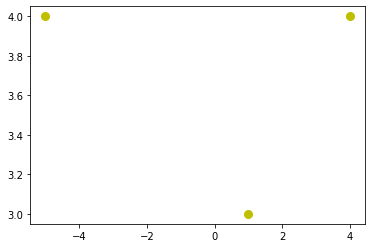

In [50]:
C1 = x[clusters==0]
C2 = x[clusters==1]
C3 = x[clusters==2]
centroids = np.array([c1, c2, c3])
#clusters 
plt.plot(C1[:,0],C1[:,1],'r.', label='cluster 1')
plt.plot(C2[:,0],C2[:,1],'b.', label='cluster 2')
plt.plot(C3[:,0],C3[:,1],'g.', label='cluster 3')

# centers
plt.plot(centroids[:,0], centroids[:,1], 'yo', markersize = 8, label='Centroids')
plt.legend(loc='best')
plt.show()

## Homework Question 3

In [107]:
x11 = np.random.standard_normal((200, 1)) * 1.2 + np.ones((200,1))-2
x12 = np.random.standard_normal((200,1))*0.8 + np.ones((200,1))-2
x1 = np.concatenate((x11, x12), axis=1)

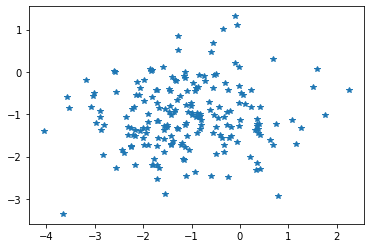

In [108]:
plt.plot(x1[:, 0], x1[:, 1], '*')

In [109]:
x21 = np.random.standard_normal((200, 1)) * 0.9 + np.ones((200,1))
x22 = np.random.standard_normal((200,1))*0.7 + np.ones((200,1))
x2 = np.concatenate((x21, x22), axis=1)


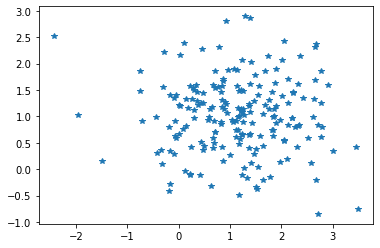

In [110]:
plt.plot(x2[:, 0], x2[:, 1], '*')

In [111]:
x31 = np.random.standard_normal((200,1))*0.8+np.ones((200,1))+3
x32 = np.random.standard_normal((200,1))*0.5+np.ones((200,1))+4
x3 = np.concatenate((x31,x32), axis=1)

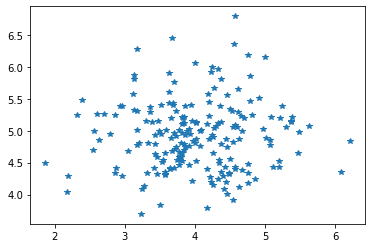

In [112]:
plt.plot(x3[:, 0], x3[:, 1], '*')

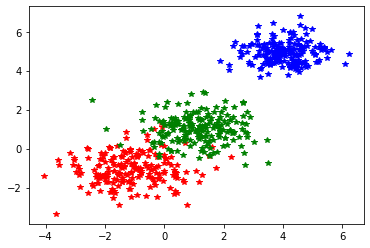

In [113]:
X = np.concatenate((x1, x2, x3), axis=0)

plt.plot(X[0:200,0], X[0:200, 1], 'r*')
plt.plot(X[200:400,0], X[200:400,1], 'g*')
plt.plot(X[400:600,0], X[400:600, 1], 'b*')

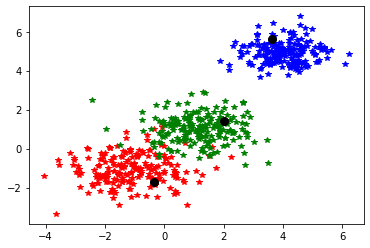

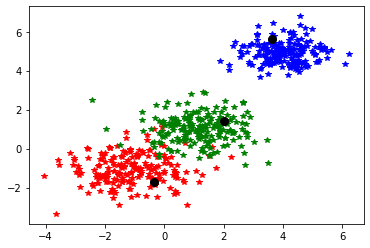

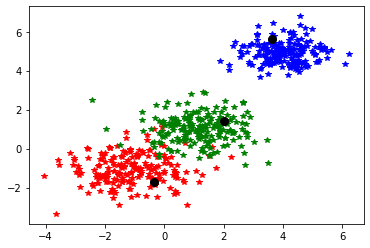

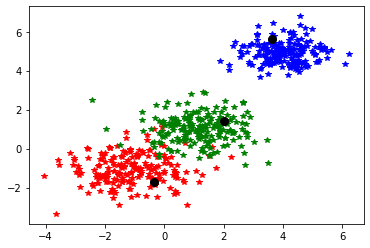

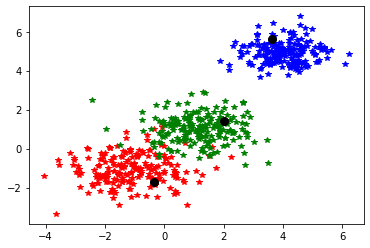

In [119]:
from scipy.spatial.distance import cdist
x = X
k = 3
no_of_iterations = 5
idx = np.sort(np.random.choice(len(x), k, replace=False))

for i in range(no_of_iterations):
    centroids = x[idx,:]
    k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')
    points = np.array([np.argmin(i) for i in k_by_1_corr_fn])

    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(X[0:200,0], X[0:200, 1], 'r*')
    ax.plot(X[200:400,0], X[200:400,1], 'g*')
    ax.plot(X[400:600,0], X[400:600, 1], 'b*')

ax.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')

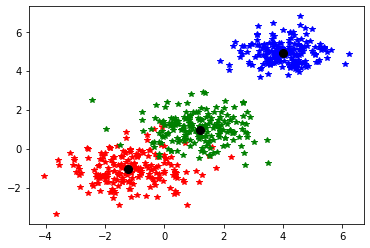

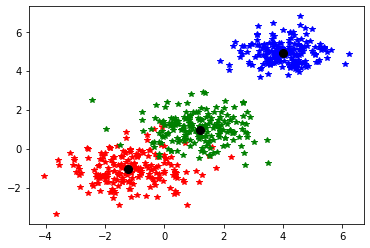

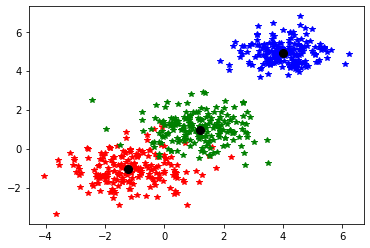

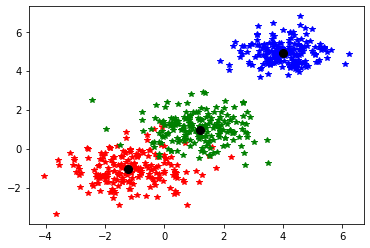

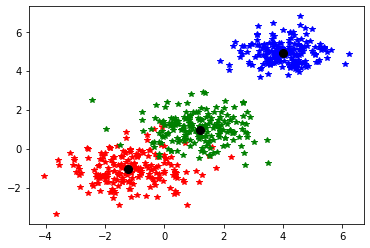

In [121]:
for _ in range(no_of_iterations):
    centroids = []
    for idx in range(k):
        temp_cent = x[points==idx].mean(axis=0)
        centroids.append(temp_cent)
    centroids = np.vstack(centroids)
    
    k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')
    points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
    
    plt.plot(X[0:200, 0], X[0:200, 1], 'r*')
    plt.plot(X[200:400, 0], X[200:400, 1], 'g*')
    plt.plot(X[400:600, 0], X[400:600, 1], 'b*')
    plt.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')
    plt.show()

## Homework Question 4

In [87]:
def generateSamples(N, variance = 100):
    X = np.matrix(range(N)).T + 1
    Y = np.matrix([random.random()*variance + i for i in range(len(X))]).T
    return X, Y

In [88]:
def fitModel_gradient(x,y):
    N = len(x)
    w = np.zeros((x.shape[1],1))
    eta = 0.0001
    maxIteration = 100
    for i in range(maxIteration):
        error = x*w - y 
        gradient = x.T *error/N
        w =w - eta*gradient
    return w

In [89]:
def plotModel(x, y, w):
    plt.plot(x[:,1], y, "x")
    plt.plot(x[:,1], x*w, "r--")
    plt.show()

In [90]:
def test(N, variance, modelFunction):
    X,Y = generateSamples(N,variance)
    X = np.hstack([np.matrix(np.ones(len(X))).T, X])
    w = modelFunction(X,Y)
    plotModel(X,Y,w)

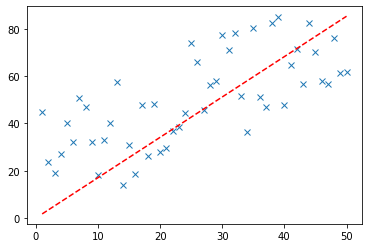

In [91]:
import random
X, Y = generateSamples(500,300)
test(50,50, fitModel_gradient)

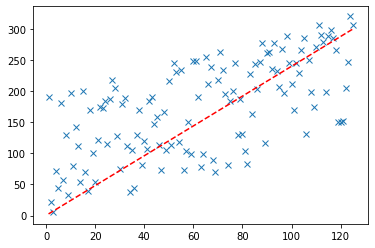

In [92]:
test(125,200, fitModel_gradient)

## Need to know for midterm and final:
Non-negative matrix factorization (NMF) is another dimension reduction method that unlike PCA, 

(15000, 784)

## Homework Question 5

In [ ]:
import scipy.optimize as sopt
from mpl_toolkits.mplot3d import Axes3D

guesses  = [np.array([1.5, 1.8])]

for i in range(3):
    
    x = guesses[-1]
    s = -df(X)
    
    def f1d(alpha):
        return f(x + alpha*s)
    
    

## Homework Question 6 : PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh

In [ ]:
# the x train is the actual unidentified image matrix data 
data = x_train[0:15000, :, :]
# the y label is the truth data, or the answer key of what the digit should be 
label = y_train[0:15000]
data = data.reshape(len(data), -1)
data.shape

In [ ]:
# standardizes data by normalizing between 0 and 1 
standardized_data = StandardScaler().fit_transform(data)

In [ ]:
## Implementation of the PCA algorithm 
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, sample_data)

# eigen value with the highest variation gives the best representation of the data
values, vectors = eigh(covar_matrix, eigvals=(782,783))
vectors = vectors.T

In [ ]:
new_coordinates = vectors @ sample_data.T

## Homework Question 7

In [ ]:
data = x_test[0:15000,:,:]
labels= y_test[0:15000]
data = data.reshape(len(data)-1)
standardized_data = StandardScaler().fit_transform(data)
sample_data = standardized_data
ica = decomposition.FastICA(n_components=2, fun='logcosh')
ica_data = ica.fit_transform(sample_data)

In [ ]:
ica_data = np.vstack((ica_data.T, labels)).T
ica_df = pd.DataFrame(data=ica_data, columns = ["1st principle","2nd principle", "label"])
sn.FacetGrid(ica_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()